In [5]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np

from wavhandler import *
from utils import *
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
sn.set()

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)

In [6]:
df_mosquitos = pd.read_pickle('./data/mosquitos.pkl')

# Creating dataframes that contain PSDs for each insect class

In [7]:
sz = 10000
df_an = make_df_parallel(df_mosquitos, setting='psd', insect_class='Anopheles', sample_size=sz).T
df_an['label'] = 'an'
df_ae = make_df_parallel(df_mosquitos, setting='psd',insect_class='Aedes', sample_size=sz).T
df_ae['label'] = 'ae'
df_cu = make_df_parallel(df_mosquitos, setting='psd',insect_class='Culex', sample_size=sz).T
df_cu['label'] = 'cu'

In [8]:
df_concat = pd.concat([df_ae, df_an, df_cu], axis=0, sort=False)
df_concat.dropna(how='all', axis=1, inplace=True)
df_concat.dropna(how='any', axis=0, inplace=True)
labelarray = df_concat.label.values
df_concat.drop('label', axis=1, inplace=True)
df_concat.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
F170208_135147_003_G_050,0.000007,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,2.192902e-07,2.225284e-07,2.257612e-07,2.288659e-07,2.317242e-07,2.342276e-07,2.362808e-07,2.378058e-07,2.387446e-07,1.195308e-07
F170212_114753_246_G_050,0.000029,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000059,0.000059,0.000059,...,1.198967e-07,1.147903e-07,1.096855e-07,1.047780e-07,1.002562e-07,9.629332e-08,9.304144e-08,9.062528e-08,8.913749e-08,4.431757e-08
F170228_040242_017_G_050_T_25.2_H_54.5,0.000029,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,...,1.211652e-07,1.338642e-07,1.465571e-07,1.587577e-07,1.699985e-07,1.798489e-07,1.879314e-07,1.939365e-07,1.976341e-07,9.944130e-08
F170227_200512_186_G_050_T_25.9_H_52.1,0.000013,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027,0.000026,0.000026,0.000026,...,1.148987e-07,1.187263e-07,1.225541e-07,1.262349e-07,1.296272e-07,1.326007e-07,1.350410e-07,1.368543e-07,1.379709e-07,6.917398e-08
F170211_101420_187_G_050,0.000029,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,1.475676e-07,1.321487e-07,1.167288e-07,1.019008e-07,8.823456e-08,7.625565e-08,6.642457e-08,5.911930e-08,5.462069e-08,2.655084e-08


### Example PSD

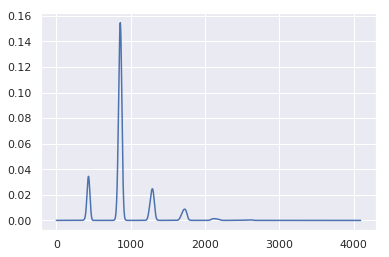

In [9]:
df_concat.iloc[9,:-1].plot()

# Loading the main dataframe created earlier to combine them both into one (merging on index)

In [10]:
df_mosquitos = pd.read_pickle('./data/mosquitos.pkl')
df_mosquitos.drop(['names','pathlen','fnamelen','temp','humd','label2'], axis=1, inplace=True)
df_mosquitos.set_index('fname', inplace=True)
labelarray_mosq = df_mosquitos.label1.values
print(df_mosquitos.shape)
df_mosquitos.tail(10)

(199358, 10)


,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,label1
fname,,,,,,,,,,
F170301_193942_059_G_050_T_25.9_H_56.0,0.077078,0.010796,0.066634,563.476562,1098.632812,1728.515625,0.046794,0.011111,0.012429,Aedes
F170301_194002_063_G_050_T_25.9_H_56.0,0.159346,0.022347,0.003921,883.789062,1791.015625,2606.445312,0.028729,0.013631,0.005620,Aedes
F170301_194005_064_G_050_T_25.9_H_56.0,0.136417,0.017447,0.002382,812.500000,1615.234375,2412.109375,0.044471,0.018138,0.012348,Aedes
F170301_194016_066_G_050_T_25.9_H_56.5,0.058850,0.147455,0.000958,862.304688,1735.351562,2541.992188,0.028879,0.014913,0.006915,Aedes
F170301_194020_068_G_050_T_25.9_H_56.5,0.106723,0.098529,0.003763,829.101562,1655.273438,2480.468750,0.028857,0.017994,0.007283,Aedes
F170301_194043_070_G_050_T_25.9_H_56.5,0.133294,0.058473,0.001965,835.937500,1683.593750,2430.664062,0.036799,0.017111,0.008035,Aedes
F170301_194049_071_G_050_T_25.9_H_56.5,0.034987,0.140925,0.001081,834.960938,1672.851562,2535.156250,0.030409,0.018681,0.007704,Aedes
F170301_194144_072_G_050_T_25.9_H_56.5,0.091359,0.024233,0.009863,797.851562,1500.976562,2360.351562,0.045900,0.018543,0.007240,Aedes
F170301_194147_073_G_050_T_25.9_H_56.5,0.070204,0.116945,0.008921,842.773438,1685.546875,2538.085938,0.028389,0.015933,0.008272,Aedes


In [11]:
df = pd.merge(df_mosquitos, df_concat, left_index=True, right_index=True)
df.drop(['label1'], axis=1, inplace=True)
# df.to_pickle('./data/big_df.pkl')
print(df.shape)
df.head()

(30000, 4106)


,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,0,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
F161205_161313_004_G_050,0.141970,0.096434,0.021948,565.429688,1126.953125,1685.546875,0.038860,0.020364,0.013905,0.000012,...,8.772525e-08,8.404185e-08,8.035863e-08,7.681707e-08,7.355323e-08,7.069251e-08,6.834482e-08,6.660034e-08,6.552610e-08,3.258169e-08
F161205_161329_006_G_050,0.044383,0.163553,0.015651,603.515625,1207.031250,1811.523438,0.038835,0.018608,0.013477,0.000010,...,1.062157e-07,1.091372e-07,1.120640e-07,1.148823e-07,1.174825e-07,1.197636e-07,1.216369e-07,1.230295e-07,1.238873e-07,6.208851e-08
F161205_161407_007_G_050,0.031372,0.150450,0.006758,619.140625,1230.468750,1841.796875,0.041009,0.022222,0.017497,0.000010,...,1.216303e-07,1.222993e-07,1.229659e-07,1.236053e-07,1.241933e-07,1.247079e-07,1.251297e-07,1.254429e-07,1.256356e-07,6.285032e-08
F161205_162541_050_G_050,0.157744,0.032184,0.002153,713.867188,1444.335938,2171.875000,0.035568,0.017241,0.006745,0.000008,...,2.265862e-07,2.293956e-07,2.322184e-07,2.349429e-07,2.374611e-07,2.396732e-07,2.414917e-07,2.428446e-07,2.436784e-07,1.219800e-07
F161205_163404_076_G_050,0.152606,0.075166,0.005901,649.414062,1303.710938,1955.078125,0.033835,0.019850,0.016733,0.000018,...,1.358040e-07,1.422344e-07,1.486639e-07,1.548457e-07,1.605423e-07,1.655351e-07,1.696324e-07,1.726769e-07,1.745516e-07,8.759230e-08


## SELECTING WHICH DATA TO CLASSIFY

In [12]:
df = df_concat#df_mosquitos.iloc[:,:-1]
cols = df.columns.tolist()
labels = labelarray
classes = np.unique(labels)
#df.label.value_counts()

In [13]:
pd.Series(labels).value_counts()

cu    10000
an    10000
ae    10000
dtype: int64

# Training a classifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

X, y = shuffle(df.values, labels, random_state=3)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
ros.fit(X,y)
X, y = ros.fit_resample(X,y)
print('After undersampling: \n{}\n'.format(pd.DataFrame(y).iloc[:,0].value_counts()))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

classifier = xgboost.XGBClassifier(n_estimators=650, learning_rate=0.2, n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ac = accuracy_score(y_test, y_pred)
#cv_ac = cross_val_score(classifier, X, y, cv=3, scoring='accuracy')
print("Name: %s, ac: %f" % ('XGBoost', ac))
#print("Name: %s, cv_ac: %f" % ('XGBoost', np.mean(cv_ac)))

After undersampling: 
cu    10000
an    10000
ae    10000
Name: 0, dtype: int64

Name: XGBoost, ac: 0.837667


## Feature importance

In [15]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                    index = df.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
55,0.002670
483,0.002213
48,0.002060
605,0.001984
50,0.001907
52,0.001755
56,0.001678
439,0.001602
47,0.001602
59,0.001450


### Saving the model

In [ ]:
import pickle

pickle.dump(classifier, open("./data/pima.pickle.dat", "wb"))
pd.Series(df.index).to_csv('./data/pima_idx_used.csv')

# loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [ ]:
pd.DataFrame(X).to_csv('./data/unsupervised/mosquitos_test.csv')

# Confusion matrix

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1542,  217,  220],
       [ 131, 1771,  130],
       [ 203,   73, 1713]])

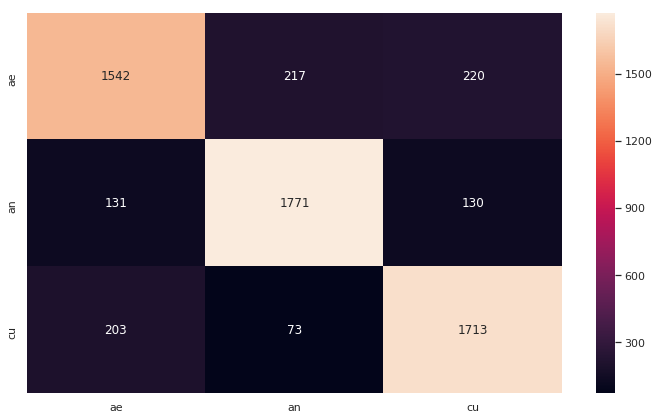

In [17]:
# Making a dataframe of the confusion matrix to plot it
df_cm = pd.DataFrame(cm, index=[i for i in classes], 
                    columns=[i for i in classes])
plt.figure(figsize=(12,7))
sn.heatmap(df_cm, annot=True, fmt='g')

plt.show()

## Distance Matrix

In [ ]:
sub = np.concatenate((X, y.reshape(-1,1)), axis=1)
sub = pd.DataFrame(sub)
sub.sort_values(by=sub.iloc[:,-1].name, inplace=True)

In [ ]:
sub.dropna(how='any', axis=0, inplace=True)


In [ ]:
from scipy.spatial.distance import pdist, squareform
D = squareform(pdist(sub.values[:,:-1], metric='euclidean'))
#‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, 
#‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, 
#‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, 
#‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.

plt.figure(figsize=(20,14))
plt.imshow(D)
plt.colorbar()

# Time warping

In [ ]:
def find_median_signal(D=None):
    a = np.nanmedian(D, axis=0)
    minval = np.argmin(a[np.nonzero(a)])
    return minval # index - argmin

In [ ]:
X = sub.values[:,:-1]

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

xx = X[50,:]
yy = X[13,:]

distance, path = fastdtw(xx, yy, dist=euclidean)
print(distance)

xx_idx = np.array([path[i][0] for i in range(len(path))])
yy_idx = np.array([path[i][1] for i in range(len(path))])

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(xx, c='r')
plt.plot(yy, c='y')
plt.legend(('xx','yy'))
#plt.ylim(0,0.15)

plt.subplot(2,2,2)
plt.plot(xx[xx_idx], c='b')
plt.plot(yy[yy_idx], c='c')
plt.legend(('xx_new','yy_new'))
#plt.ylim(0,0.15)

plt.subplot(2,2,3)
plt.plot(xx, c='r')
plt.plot(xx[xx_idx], c='b')
plt.legend(('xx','xx_new'))
#plt.ylim(0,0.15)

plt.subplot(2,2,4)
plt.plot(yy, c='y')
plt.plot(yy[yy_idx], c='c')
plt.legend(('yy','yy_new'))
#plt.ylim(0,0.15)

In [ ]:
median_signal_idx = find_median_signal(D=X.astype(float))
median_signal = X[median_signal_idx,:]
plt.plot(median_signal)

In [ ]:
#X.shape

D_dtw = np.zeros((600,600))

def warp_with_median_signal(xx, median_signal, distance=euclidean):
    _, path = fastdtw(xx, median_signal, dist=distance)
    
    idx = np.array([path[i][0] for i in range(len(path))])
    sig = xx[idx]
    
    return sig[:128]

In [ ]:
sig = X[10,:]
plt.subplot(1,2,1)
plt.plot(warp_with_median_signal(sig, median_signal, distance=euclidean))
#plt.xlim(0,2500)

plt.subplot(1,2,2)
plt.plot(sig)
#plt.xlim(0,2500)

In [ ]:
from tqdm import tqdm

XX = []
for i in tqdm(range(X.shape[0])):
    XX.append(warp_with_median_signal(X[i,:], median_signal, distance=euclidean))

In [ ]:
len(XX[2])

In [ ]:
XX = np.vstack(XX)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

X, y = shuffle(XX, y, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

classifier = xgboost.XGBClassifier(n_estimators=300, n_jobs=-1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print("Name: %s, ac: %f" % ('XGBoost', ac))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm